In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# Import utilities
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir("/content/drive/My Drive/Colab Notebooks/Lab6/augmentation-packages-overview-master/images"))

# Import Image manipulation
from PIL import Image

# Import data visualization
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import matplotlib

# Import PyTorch
import torch
from torch import nn
import torch.nn.functional as F
import torchvision.transforms.functional as TF
from torch.utils.data import Dataset, DataLoader

['image1.jpg', 'mask1.png']


In [4]:
! pip install augmentor

In [5]:
! pip install albumentations

     |████████████████████████████████| 634kB 3.2MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=738e7b1a1e5f66750402128c6705a09355b5c1bca8c621dd8f9e2e64f371930e
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [7]:
# load sample dog image
dog_img = Image.open('/content/drive/My Drive/Colab Notebooks/Lab6/augmentation-packages-overview-master/images/image1.jpg')

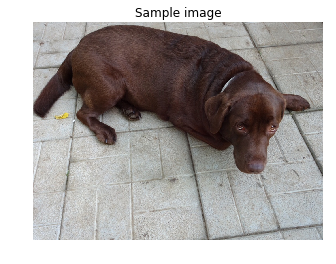

In [ ]:
# show the demo image
plt.title('Sample image')
plt.axis('off')
plt.imshow(dog_img)

In [8]:
# load mask for sample dog image
dog_mask = Image.open('/content/drive/My Drive/Colab Notebooks/Lab6/augmentation-packages-overview-master/images/mask1.png')

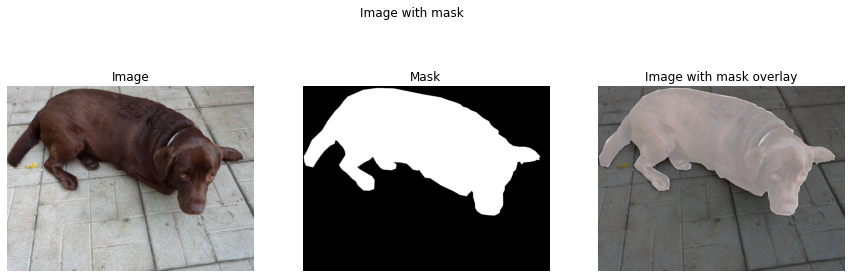

In [9]:
# define a function plot image and mask
def plot_image_and_mask(image, mask):
    '''
    Function to plot a single prediction:
    INPUT:
        image - PIL image 
        mask - PIL image with corresponding mask
    '''
    fig, axs = plt.subplots(1, 3, figsize=(15,5))

    #plot the original data
    axs[0].imshow(image) 
    axs[0].axis('off')
    axs[0].set_title('Image')

    #plot the mask
    axs[1].imshow(mask)
    axs[1].axis('off')   
    axs[1].set_title('Mask')
    
    #plot image and add the mask
    axs[2].imshow(image)
    axs[2].imshow(mask, alpha = 0.5, cmap = "Reds")
    axs[2].axis('off')   
    axs[2].set_title('Image with mask overlay')

    # set suptitle
    plt.suptitle('Image with mask')
    plt.show()

# plot image and a mask
plot_image_and_mask(dog_img, dog_mask)

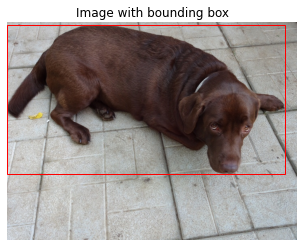

In [10]:
# sample code from
# https://stackoverflow.com/questions/37435369/matplotlib-how-to-draw-a-rectangle-on-image

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(dog_img)

# Create a Rectangle patch
rect = patches.Rectangle((0,9),980,525,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)
ax.axis('off') # disable axis

plt.title('Image with bounding box')
plt.show()